<a href="https://colab.research.google.com/github/jnsbrdbr/mlproject/blob/master/starclassicication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [398]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [400]:
data= pd.read_csv('/content/drive/MyDrive/ex01/Stars.csv')

In [401]:
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [402]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data_num = data.iloc[:, [0, 1, 2, 3]]
data_num

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [403]:
data_cat = data.iloc[:, [4, 5]]
data_cat

,Color,Spectral_Class
0,Red,M
1,Red,M
2,Red,M
3,Red,M
4,Red,M
...,...,...
235,Blue,O
236,Blue,O
237,White,A
238,White,A


In [404]:
enc.fit(data_cat)

OrdinalEncoder()

In [405]:
data_cat_to_num = enc.transform(data_cat)
data_cat_to_num_frame = pd.DataFrame(data_cat_to_num)
data_cat_to_num_frame

,0,1
0,8.0,5.0
1,8.0,5.0
2,8.0,5.0
3,8.0,5.0
4,8.0,5.0
...,...,...
235,0.0,6.0
236,0.0,6.0
237,9.0,0.0
238,9.0,0.0


In [406]:
data_cat_to_num_frame.rename(columns={0:'Color', 1:'Spectral_Class'},
                             inplace=True)
data_cat_to_num_frame

,Color,Spectral_Class
0,8.0,5.0
1,8.0,5.0
2,8.0,5.0
3,8.0,5.0
4,8.0,5.0
...,...,...
235,0.0,6.0
236,0.0,6.0
237,9.0,0.0
238,9.0,0.0


In [407]:
df = pd.concat([data_num, data_cat_to_num_frame,data['Type']], axis=1)
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8.0,5.0,0
1,3042,0.000500,0.1542,16.60,8.0,5.0,0
2,2600,0.000300,0.1020,18.70,8.0,5.0,0
3,2800,0.000200,0.1600,16.65,8.0,5.0,0
4,1939,0.000138,0.1030,20.06,8.0,5.0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0.0,6.0,5
236,30839,834042.000000,1194.0000,-10.63,0.0,6.0,5
237,8829,537493.000000,1423.0000,-10.73,9.0,0.0,5
238,9235,404940.000000,1112.0000,-11.23,9.0,0.0,5


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'L'}>, <Axes: title={'center': 'R'}>],
       [<Axes: title={'center': 'A_M'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Spectral_Class'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

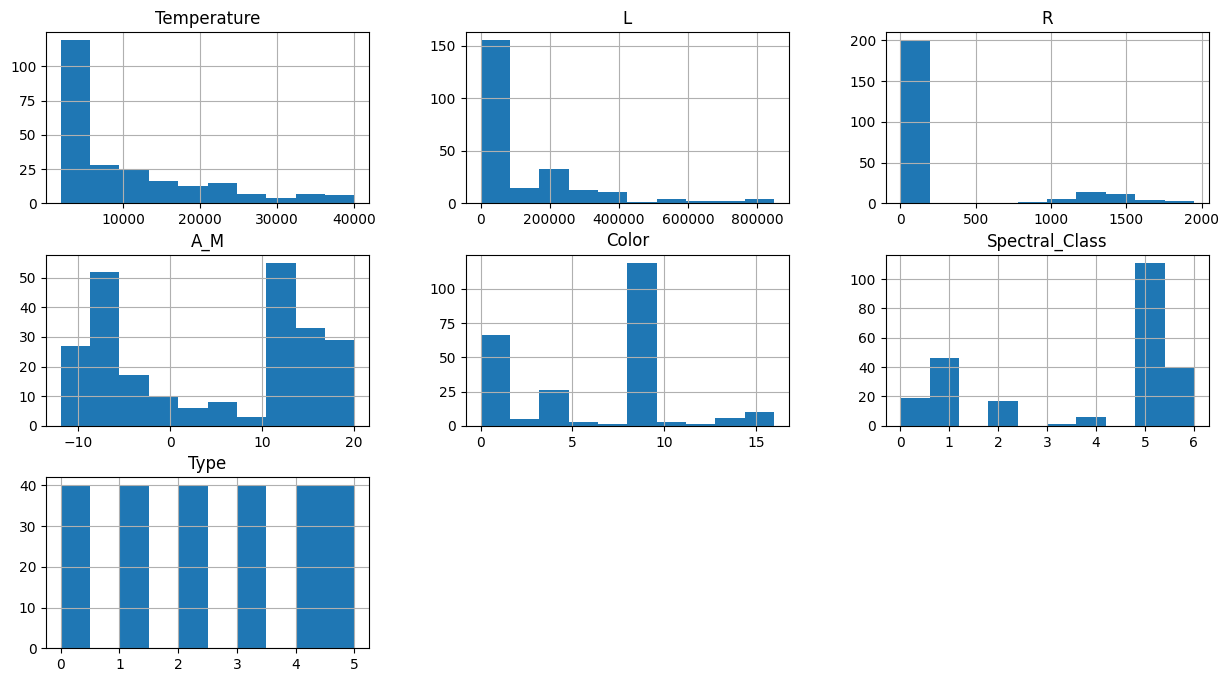

In [408]:
df.hist(figsize=(15,8))

<Axes: xlabel='Color', ylabel='count'>

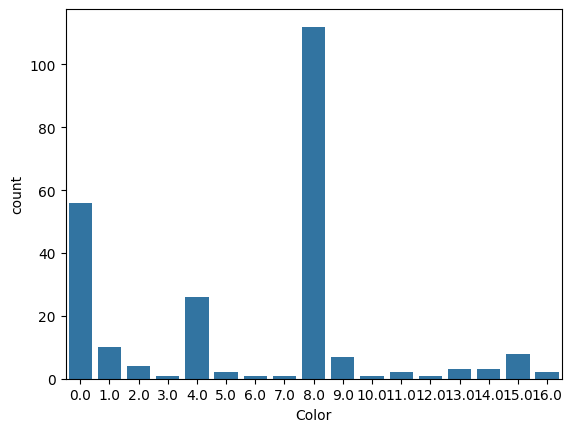

In [409]:
import seaborn as sns
sns.countplot(x='Color', data=df)


<Axes: xlabel='Spectral_Class', ylabel='count'>

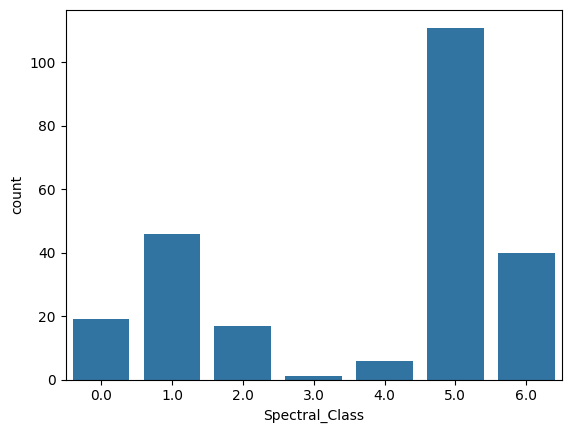

In [410]:
import seaborn as sns
sns.countplot(x='Spectral_Class', data=df)


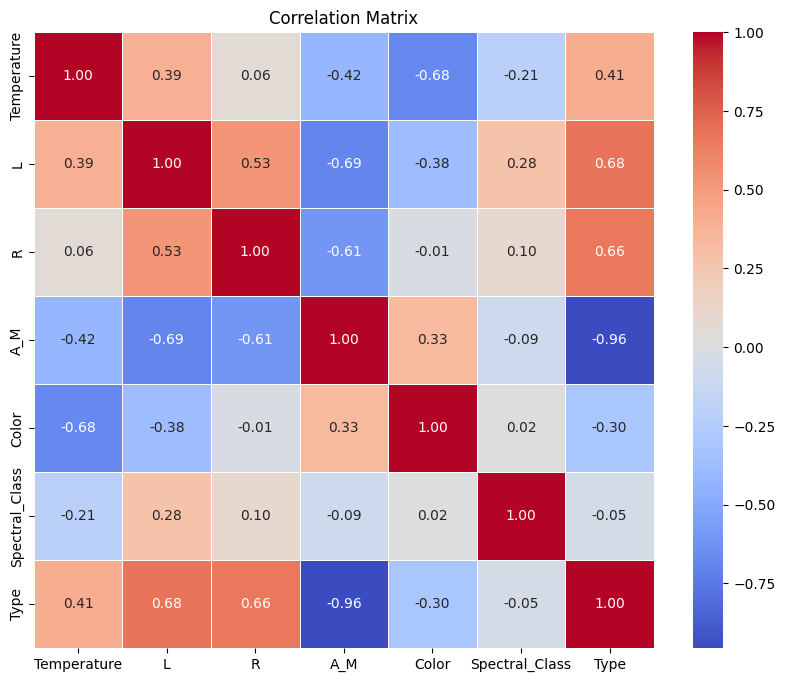

In [411]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [412]:
print(df.isnull().sum())

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


In [413]:
df['Type'].value_counts()

,count
Type,
0,40
1,40
2,40
3,40
4,40
5,40


In [414]:
# Randomly shuffle the data
df = df.sample(frac=1, random_state=42)

# Split based on fraction
test_frac = 0.4
test_size = int(len(df) * test_frac)

# Create test and train sets
test = df.iloc[:test_size].reset_index(drop=True)
train = df.iloc[test_size:].reset_index(drop=True)


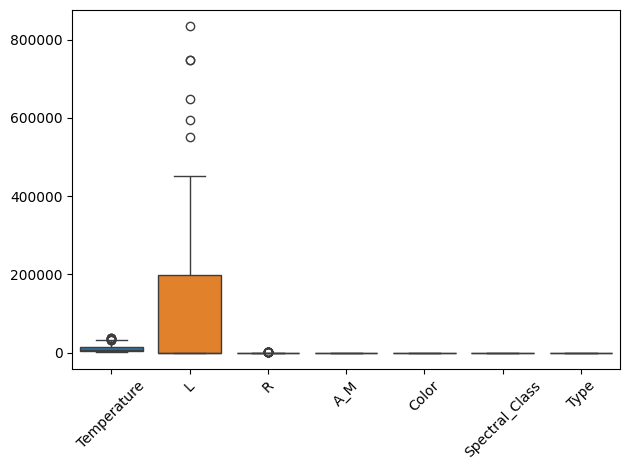

In [415]:
sns.boxplot(data=train)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [416]:
class IQRClipper:
    def __init__(self, columns, factor=1.5):
        self.columns = columns
        self.factor = factor
        self.bounds = {}

    def fit(self, df):
        for col in self.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - self.factor * IQR
            upper = Q3 + self.factor * IQR
            self.bounds[col] = (lower, upper)
        return self

    def transform(self, df):
        df_copy = df.copy()
        for col in self.columns:
            lower, upper = self.bounds[col]
            df_copy[col] = df_copy[col].clip(lower, upper)
        return df_copy


In [417]:
# Say these are your numeric columns you want to check for outliers
columns_to_clip = ['Temperature', 'L', 'R']

# Create and fit on training data
iqr_clipper = IQRClipper(columns=columns_to_clip)
iqr_clipper.fit(train)

# Transform both train and test sets
train_cleaned = iqr_clipper.transform(train)
test_cleaned = iqr_clipper.transform(test)


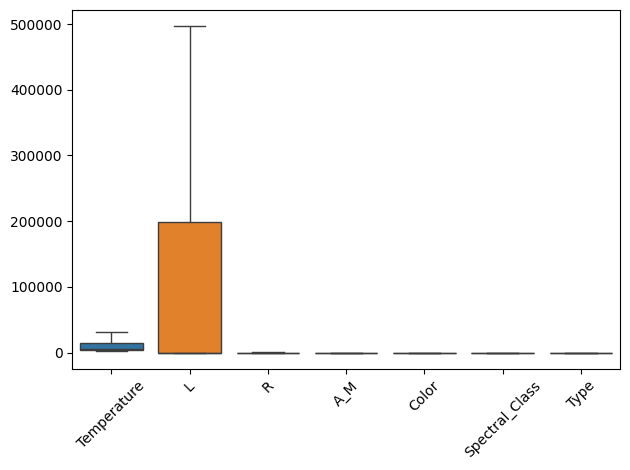

In [418]:
sns.boxplot(data=train_cleaned)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [419]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select numeric columns to normalize
numeric_columns = ['Temperature', 'L', 'R','A_M']  # replace with your own columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit scaler only on training data
train_scaled = train_cleaned.copy()
train_scaled[numeric_columns] = scaler.fit_transform(train_cleaned[numeric_columns])

# Transform test data using the same scaler
test_scaled = test_cleaned.copy()
test_scaled[numeric_columns] = scaler.transform(test_cleaned[numeric_columns])


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'L'}>, <Axes: title={'center': 'R'}>],
       [<Axes: title={'center': 'A_M'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Spectral_Class'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

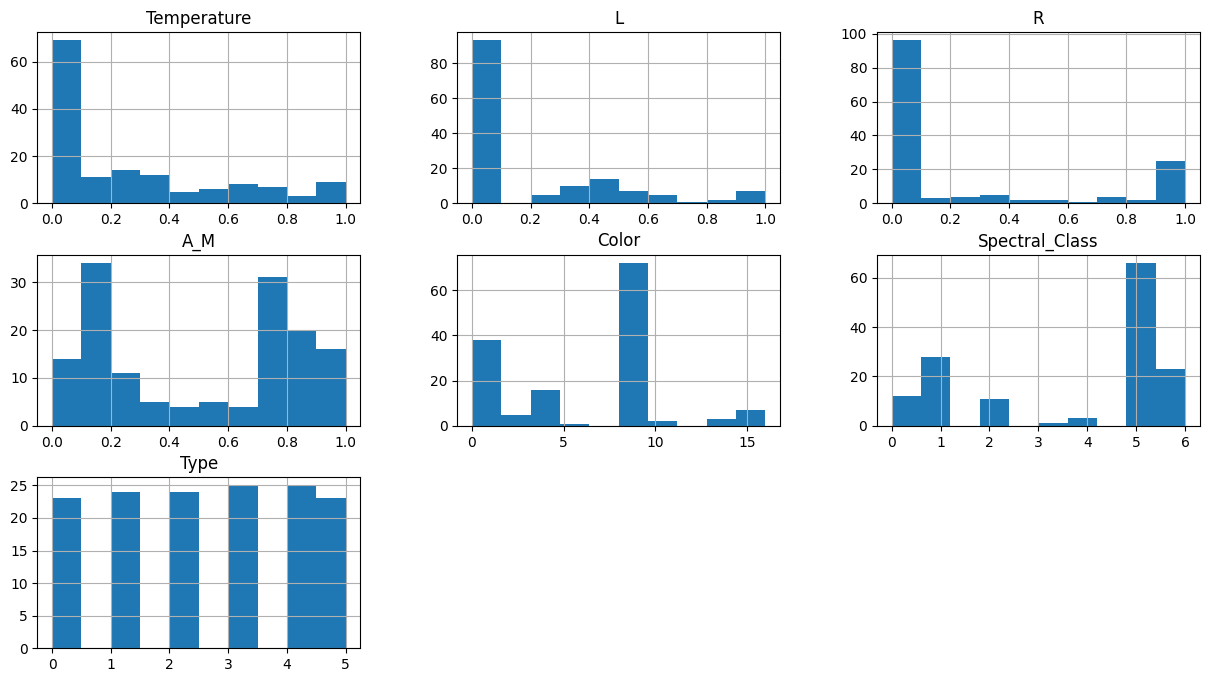

In [420]:
train_scaled.hist(figsize=(15,8))

In [421]:
X = train_scaled.drop(columns=['Type'])
y = train_scaled['Type']

In [422]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


X_test = test_scaled.drop(columns=['Type'])
y_test = test_scaled['Type']

In [423]:
print(y.value_counts())


Type
4    25
3    25
1    24
2    24
5    23
0    23
Name: count, dtype: int64


In [424]:
print(y_test.value_counts())

Type
0    17
5    17
2    16
1    16
4    15
3    15
Name: count, dtype: int64


In [425]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Cross-validation strategy
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models and their param grids
models = {
    "SVM": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(class_weight='balanced'))
        ]),
        {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf'],
            'clf__gamma': ['scale', 'auto']
        }
    ),
    "KNN": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())
        ]),
        {
            'clf__n_neighbors': [3, 5, 7],
            'clf__weights': ['uniform', 'distance']
        }
    ),
    "DecisionTree": (
        Pipeline([
            ('clf', DecisionTreeClassifier(class_weight='balanced', random_state=42))
        ]),
        {
            'clf__max_depth': [3, 5, 10, None],
            'clf__min_samples_split': [2, 5, 10],
            'clf__criterion': ['gini', 'entropy']
        }
    ),
    "XGBoost": (
        Pipeline([
            ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
        ]),
        {
            'clf__n_estimators': [50, 100],
            'clf__max_depth': [3, 5],
            'clf__learning_rate': [0.01, 0.1]
        }
    )
}


In [426]:
for name, (pipeline, param_grid) in models.items():
    print(f"\n Tuning {name}...")

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-val accuracy for {name}: {grid_search.best_score_:.4f}")

    # Evaluate on actual test set
    best_model = grid_search.best_estimator_
    y_test_pred = best_model.predict(X_test)

    print(f"Test Set Evaluation for {name}:\n")
    print(classification_report(y_test, y_test_pred))



 Tuning SVM...
Best parameters for SVM: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best cross-val accuracy for SVM: 0.9913
Test Set Evaluation for SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00        16
           3       1.00      0.93      0.97        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96


 Tuning KNN...
Best parameters for KNN: {'clf__n_neighbors': 3, 'clf__weights': 'distance'}
Best cross-val accuracy for KNN: 0.9826
Test Set Evaluation for KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
